In [1]:
from qiskit import QuantumCircuit,ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.extensions import Initialize

In [2]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

C:\Users\pc\AppData\Local\Temp\ipykernel_7752\3368799418.py:34: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Error Detection Counts:
{'001': 1024}


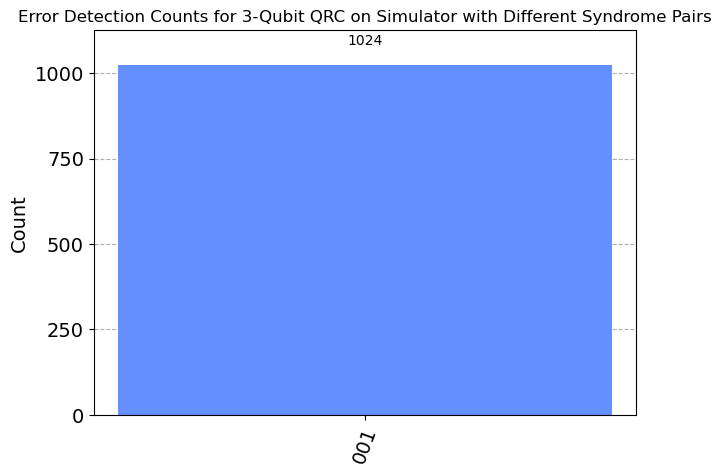

In [4]:

# Error Detection Circuit
qc_detect = QuantumCircuit(5, 3)

# Initialize the first qubit to |1>
qc_detect.initialize([1, 0], 0)


# Entangle the first three qubits
qc_detect.cx(0, 1)
qc_detect.cx(0, 2)
qc_detect.barrier()

# Introduce a bit flip error on the third qubit
qc_detect.x(2)
qc_detect.barrier()

# Set up ancilla qubits for error detection
# First ancilla qubit for parity check between qubit 0 and qubit 1
qc_detect.cx(0, 3)
qc_detect.cx(2, 3)

# Second ancilla qubit for parity check between qubit 1 and qubit 2
qc_detect.cx(0, 4)
qc_detect.cx(1, 4)

# Measure the ancilla qubits
qc_detect.measure(3, 0) # Measure first ancilla qubit
qc_detect.measure(4, 1) # Measure second ancilla qubit

# Simulate the error detection circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc_detect = transpile(qc_detect, simulator)
qobj = assemble(transpiled_qc_detect)
result = simulator.run(qobj).result()
error_counts = result.get_counts(qc_detect)
print("Error Detection Counts:")
print(error_counts)
plot_histogram(error_counts, title="Error Detection Counts for 3-Qubit QRC on Simulator with Different Syndrome Pairs")


In [5]:
print(qc_detect)

     ┌─────────────────┐           ░       ░                           
q_0: ┤ Initialize(1,0) ├──■────■───░───────░───■─────────■─────────────
     └─────────────────┘┌─┴─┐  │   ░       ░   │         │             
q_1: ───────────────────┤ X ├──┼───░───────░───┼─────────┼────■────────
                        └───┘┌─┴─┐ ░ ┌───┐ ░   │         │    │        
q_2: ────────────────────────┤ X ├─░─┤ X ├─░───┼────■────┼────┼────────
                             └───┘ ░ └───┘ ░ ┌─┴─┐┌─┴─┐  │    │  ┌─┐   
q_3: ──────────────────────────────░───────░─┤ X ├┤ X ├──┼────┼──┤M├───
                                   ░       ░ └───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┐
q_4: ──────────────────────────────░───────░───────────┤ X ├┤ X ├─╫─┤M├
                                   ░       ░           └───┘└───┘ ║ └╥┘
c: 3/═════════════════════════════════════════════════════════════╩══╩═
                                                                  0  1 


C:\Users\pc\AppData\Local\Temp\ipykernel_7752\2063389951.py:12: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_corrected = simulator.run(qobj_corrected).result()


Corrected Counts:
{'000': 1024}


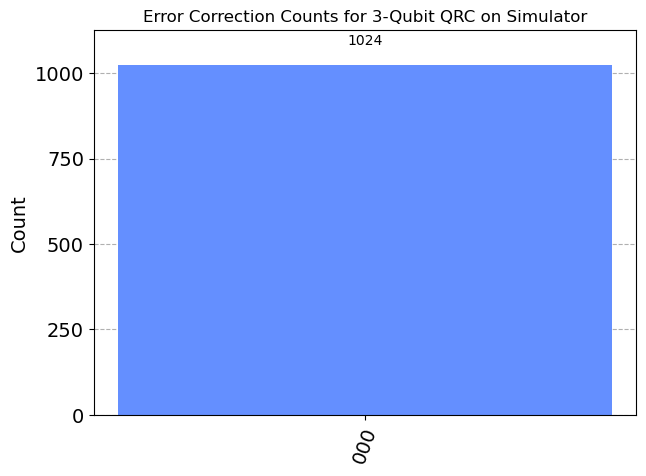

In [6]:
# Error Correction
qc_detect.barrier()
qc_detect.x(2).c_if(qc_detect.clbits[0], 1).c_if(qc_detect.clbits[1], 0)

# Measure data qubits into separate classical bits
qc_detect.measure([0, 1, 2], [0, 1, 2])

# Simulate the corrected circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_corrected_qc = transpile(qc_detect, simulator)
qobj_corrected = assemble(transpiled_corrected_qc)
result_corrected = simulator.run(qobj_corrected).result()

# Get the corrected counts
corrected_counts = result_corrected.get_counts(qc_detect)
print("Corrected Counts:")
print(corrected_counts)
plot_histogram(corrected_counts, title="Error Correction Counts for 3-Qubit QRC on Simulator")

In [7]:
print(qc_detect)

     ┌─────────────────┐           ░       ░                            ░ »
q_0: ┤ Initialize(1,0) ├──■────■───░───────░───■─────────■──────────────░─»
     └─────────────────┘┌─┴─┐  │   ░       ░   │         │              ░ »
q_1: ───────────────────┤ X ├──┼───░───────░───┼─────────┼────■─────────░─»
                        └───┘┌─┴─┐ ░ ┌───┐ ░   │         │    │         ░ »
q_2: ────────────────────────┤ X ├─░─┤ X ├─░───┼────■────┼────┼─────────░─»
                             └───┘ ░ └───┘ ░ ┌─┴─┐┌─┴─┐  │    │  ┌─┐    ░ »
q_3: ──────────────────────────────░───────░─┤ X ├┤ X ├──┼────┼──┤M├────░─»
                                   ░       ░ └───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┐ ░ »
q_4: ──────────────────────────────░───────░───────────┤ X ├┤ X ├─╫─┤M├─░─»
                                   ░       ░           └───┘└───┘ ║ └╥┘ ░ »
c: 3/═════════════════════════════════════════════════════════════╩══╩════»
                                                                  0  1    »
«           